# Final Project 2

In [23]:
import numpy as np
import sep

additional setup for reading the test image and displaying plots

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

read image into standard 2-d numpy array

In [3]:
data = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits', ext = 0)

show the image

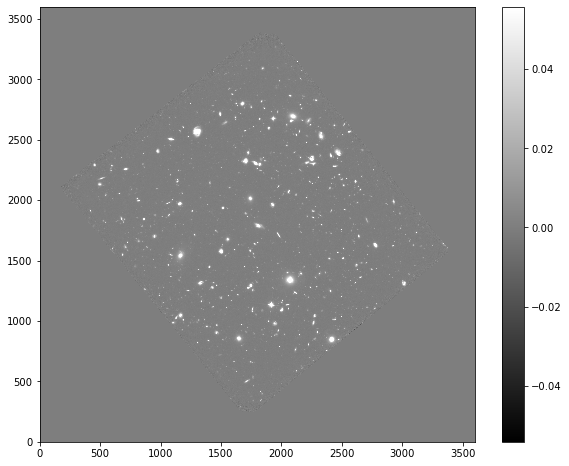

In [4]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation = 'nearest', cmap = 'gray', vmin = m - s, vmax = m + s, origin = 'lower')
plt.colorbar()
plt.savefig('Final_Project_UDF_Figure_1.png', dpi = 300)

measure a spatially varying background on the image

In [5]:
data = data.byteswap(inplace = True).newbyteorder()
bkg = sep.Background(data)

get a "global" mean and noise of the image background:

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


evaluate background as 2-d array, same size as original image

In [7]:
bkg_image = bkg.back()

bkg_image = np.array(bkg) # equivalent to above

show the background

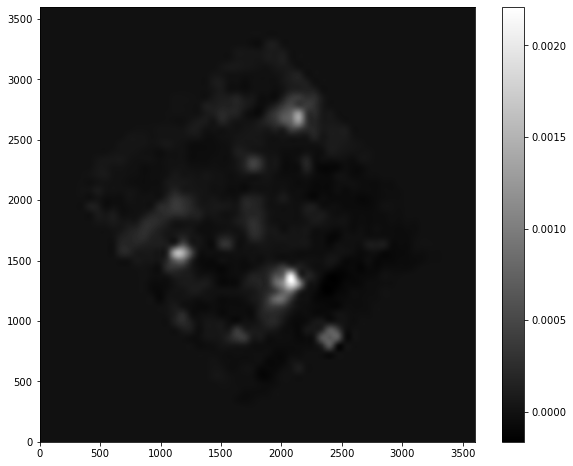

In [8]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Final_Project_UDF_Figure_2.png', dpi = 300)

evaluate the background noise as 2-d array, same size as original image

In [9]:
bkg_rms = bkg.rms()

show the background noise

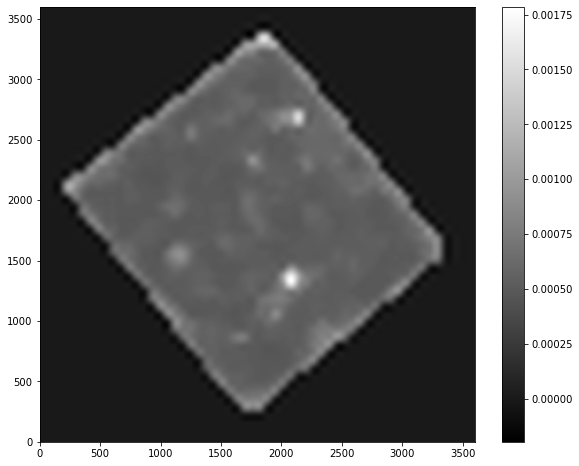

In [10]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('Final_Project_UDF_Figure_3.png', dpi = 300)

subtract the background

In [11]:
data_sub = data - bkg

In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

how many objects were detected

In [13]:
len(objects)

8646

In [14]:
from matplotlib.patches import Ellipse

plot background-subtracted image

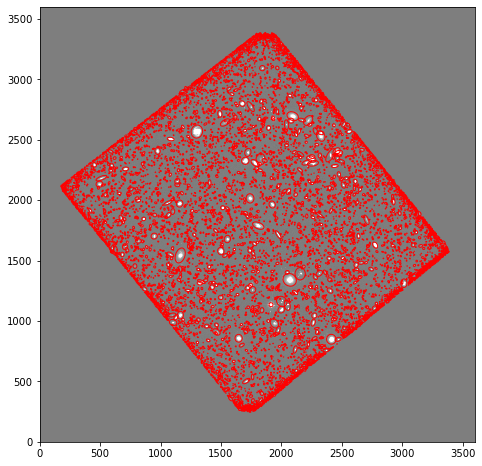

In [15]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')
# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.savefig('Final_Project_UDF_Figure_4.png', dpi = 300)

available fields

In [16]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [17]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

show the first 10 objects results:

In [18]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


Histogram

Extracting the fluxes

In [19]:
# fluxes = [obj['flux'] for obj in objects]
fluxes = objects['flux']

In [21]:
mean_flux = np.mean(fluxes)
median_flux = np.median(fluxes)
std_flux = np.std(fluxes)

print(f"Mean flux: {mean_flux}")
print(f"Median flux: {median_flux}")
print(f"Standard Deviation of flux: {std_flux}")

Mean flux: 1.1718756309645812
Median flux: 0.034781020134687424
Standard Deviation of flux: 17.540154103342076


In [25]:
largest_flux = np.max(fluxes)
largest_flux_index = np.argmax(fluxes)

# Determine how many standard deviations the largest flux is away from the mean
std_devs_away = (largest_flux - mean_flux) / std_flux

# Get the position of the largest outlier

print(f"Largest outlier flux: {largest_flux}")
print(f"Number of standard deviations away from the mean: {std_devs_away}")

Largest outlier flux: 1218.4075927734375
Number of standard deviations away from the mean: 69.3970936612548


Plotting the histogram of fluxes

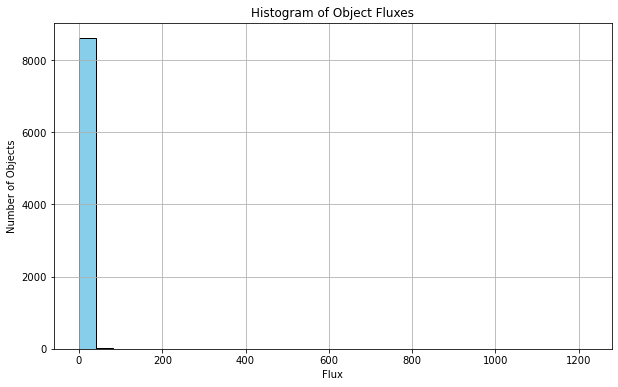

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(fluxes, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Object Fluxes')
plt.xlabel('Flux')
plt.ylabel('Number of Objects')
plt.grid(True)
plt.show()